## Displaying IFC documentation right in your notebook
The helper class `utils.IfcHelp` allows you to quickly pull the official IFC docs intor your browser. Both versions 2x3 and  4 are supported through their respective `IfcHelp3(Enitity)` and `IfcHelp4(Enitity)` calls.

In [7]:
import utils.IfcHelp as IfcHelp
IfcHelp.getHelp4("ifcdoor")

In [8]:
import ifcopenshell

In [9]:
m = ifcopenshell.open("../data/Duplex_A.ifc")
#m = ifcopenshell.open("../data/231110AC-11-Smiley-West-04-07-2007.ifc")

In [10]:
rooms = m.by_type("IfcSpace")

In [11]:
len(rooms)

21

In [12]:
r = rooms[2]

In [13]:
r

#1928=IfcSpace('0BTBFw6f90Nfh9rP1dl_3P',#33,'B104','',$,#1917,#1927,'Bathroom 1',.ELEMENT.,.INTERNAL.,$)

In [14]:
m.get_inverse(r)

[#1931=IfcRelDefinesByProperties('1vwWpLunP7Z8FUDxnwGsLX',#33,$,$,(#1928),#1930),
 #2045=IfcRelDefinesByProperties('1jXMmAObv0Hu3Dpe4J75XR',#33,$,$,(#1928),#2044),
 #2071=IfcRelDefinesByProperties('1yk3uGxCn2xAd5LVDuWQpz',#33,$,$,(#1928),#2070),
 #2073=IfcRelDefinesByProperties('2Aev3rsmjERh$PzhdZ9sae',#33,$,$,(#1928),#2072),
 #2075=IfcRelDefinesByProperties('29A592s2zDtA8O1HY743gi',#33,$,$,(#1928),#2074),
 #2077=IfcRelDefinesByProperties('2EYry8dpj1aedcHhTWWR5_',#33,$,$,(#1928),#2076),
 #2079=IfcRelDefinesByProperties('0NaXw2iR1EBuKa8Xg1RIe1',#33,$,$,(#1928),#2078),
 #38297=IfcRelAggregates('2SL_IUiH54GP6$rzyEgw3l',#33,$,$,#39,(#67,#212,#355,#514,#1627,#1782,#1928,#2108,#3456,#3586)),
 #38804=IfcRelSpaceBoundary('3c$xyphFr0dwUMO2fin7Rk',#33,'1stLevel',$,#1928,#23671,#1941,.PHYSICAL.,.INTERNAL.),
 #38805=IfcRelSpaceBoundary('2c2En85dLEeB9F0b8J3_ve',#33,'1stLevel',$,#1928,#23768,#1952,.PHYSICAL.,.INTERNAL.),
 #38806=IfcRelSpaceBoundary('1zFkNKrw5EzuGg_6R0YeH3',#33,'1stLevel',$,#1928,#23

In [15]:
r.IsDefinedBy[1].RelatingPropertyDefinition

#2044=IfcPropertySet('1QCvFS1aX1VArX3QmOThbz',#33,'Pset_SpaceCommon',$,(#2040,#2041,#2042,#2043))

In [16]:
m.traverse(r, max_levels=1)

[#1928=IfcSpace('0BTBFw6f90Nfh9rP1dl_3P',#33,'B104','',$,#1917,#1927,'Bathroom 1',.ELEMENT.,.INTERNAL.,$),
 #33=IfcOwnerHistory(#32,#2,$,.NOCHANGE.,$,$,$,0),
 #1917=IfcLocalPlacement(#38,#1916),
 #1927=IfcProductDefinitionShape($,$,(#1926))]

## Visualizing the model graph

In [17]:
r.get_info()

{'id': 1928,
 'type': 'IfcSpace',
 'GlobalId': '0BTBFw6f90Nfh9rP1dl_3P',
 'OwnerHistory': #33=IfcOwnerHistory(#32,#2,$,.NOCHANGE.,$,$,$,0),
 'Name': 'B104',
 'Description': '',
 'ObjectType': None,
 'ObjectPlacement': #1917=IfcLocalPlacement(#38,#1916),
 'Representation': #1927=IfcProductDefinitionShape($,$,(#1926)),
 'LongName': 'Bathroom 1',
 'CompositionType': 'ELEMENT',
 'InteriorOrExteriorSpace': 'INTERNAL',
 'ElevationWithFlooring': None}

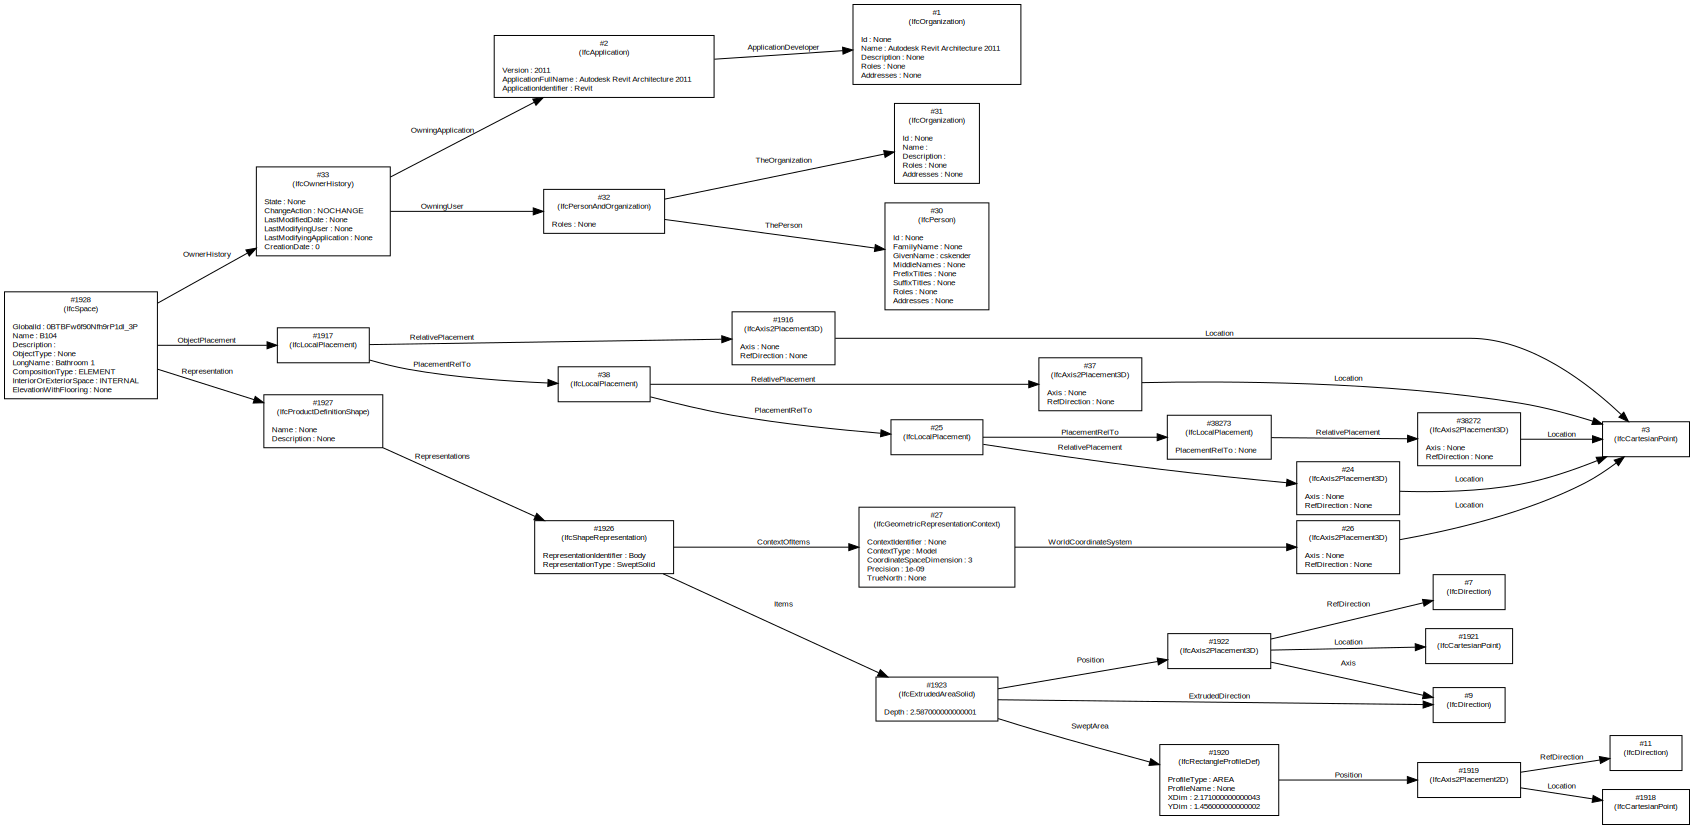

In [18]:
from utils import IfcGraphViz
#graph = IfcGraphViz.IfcGraphViz().plot_graph(m, r)
graph = IfcGraphViz.IfcGraphViz().plot_graph(m, r)
graph

In [21]:
history = m.by_id(33)
history.get_info()

{'id': 33,
 'type': 'IfcOwnerHistory',
 'OwningUser': #32=IfcPersonAndOrganization(#30,#31,$),
 'OwningApplication': #2=IfcApplication(#1,'2011','Autodesk Revit Architecture 2011','Revit'),
 'State': None,
 'ChangeAction': 'NOCHANGE',
 'LastModifiedDate': None,
 'LastModifyingUser': None,
 'LastModifyingApplication': None,
 'CreationDate': 0}

In [22]:
IfcHelp.getHelp4("IfcPersonAndOrganization")

# Plot inverse relations

#4131=IfcWallStandardCase('2O2Fr$t4X7Zf8NOew3FNld',#33,'Basic Wall:Interior - Partition (92mm Stud):138584',$,'Basic Wall:Interior - Partition (92mm Stud):128360',#4118,#4130,'138584')


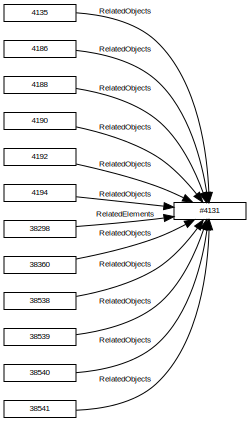

In [23]:
#graph = IfcGraphViz.IfcGraphViz().plot_graph(m, r)
print(m.by_type("IfcWall")[0])
graph = IfcGraphViz.IfcGraphViz().plot_reverse_graph(m, m.by_type("IfcWall")[0])
graph

In [24]:
import ifcopenshell.util.element

In [25]:
ifcopenshell.util.element.get_psets(r)

{'GSA Space Areas': {'GSA BIM Area': 3.997752000000072},
 'Pset_SpaceCommon': {'Reference': '',
  'CeilingCovering': 'CeilingCovering',
  'WallCovering': 'WallCovering',
  'FloorCovering': 'FloorCovering'},
 'PSet_Revit_Identity Data': {'Number': 'B104',
  'Name': 'Bathroom 1',
  'OmniClass Table 13 Category': '13-41 11 14 11: Bathroom'},
 'PSet_Revit_Constraints': {'Level': 'Level 1',
  'Upper Limit': 'Level 1',
  'Limit Offset': 2.6,
  'Base Offset': 0.0},
 'PSet_Revit_Dimensions': {'Area': 3.997752000000072,
  'Perimeter': 8.204000000000091,
  'Unbounded Height': 2.6,
  'Volume': 8.177444912000173},
 'PSet_Revit_Phasing': {'Phase': 'New Construction'},
 'PSet_Revit_Other': {'CeilingCovering': 'CeilingCovering',
  'FloorCovering': 'FloorCovering',
  'WallCovering': 'WallCovering',
  'LoadCapacity': 'LoadCapacity',
  'Category Description': 'Bathroom',
  'Category Code': '13-41 11 14 11',
  'CirculationZoneName': 'Unit B CirculationZoneName',
  'FireAlarmZoneName': 'Unit B FireAlarmZo

In [26]:
walls = m.by_type("IfcWall")

Count the number of walls in the entire building: `len` gets the size of collection datatypes in python [Documentation here](https://docs.python.org/3.8/library/functions.html#len)

In [27]:
len(walls)

57

In [29]:
wall = walls[12]
wall

#5106=IfcWallStandardCase('2O2Fr$t4X7Zf8NOew3FK1b',#33,'Basic Wall:Foundation - Concrete (435mm):141018',$,'Basic Wall:Foundation - Concrete (435mm):207146',#5093,#5105,'141018')

In [31]:
wall
pset_for_wall = ifcopenshell.util.element.get_psets(wall)
pset_for_wall

{'Pset_WallCommon': {'Reference': 'Basic Wall:Foundation - Concrete (435mm)',
  'LoadBearing': True,
  'ExtendToStructure': False,
  'IsExternal': True},
 'PSet_Revit_Constraints': {'Location Line': 0,
  'Base Constraint': 'T/FDN',
  'Base Offset': 0.0,
  'Base is Attached': False,
  'Base Extension Distance': 0.0,
  'Top Constraint': 'Up to level: Level 1',
  'Unconnected Height': 1.123,
  'Top Offset': -0.127,
  'Top is Attached': False,
  'Top Extension Distance': 0.0,
  'Room Bounding': True,
  'Related to Mass': False},
 'PSet_Revit_Other': {'InstallationDate': 'InstallationDate',
  'SerialNumber': 'SerialNumber',
  'WarrantyStartDate': 'WarrantyStartDate',
  'BarCode': 'BarCode',
  'AssetIdentifier': 'AssetIdentifier',
  'TagNumber': 'TagNumber'},
 'PSet_Revit_Phasing': {'Phase Created': 'New Construction'},
 'PSet_Revit_Structural': {'Rebar Cover - Exterior Face': 'Rebar Cover 1 <0.025>',
  'Rebar Cover - Interior Face': 'Rebar Cover 1 <0.025>',
  'Rebar Cover - Other Faces': 'R

## Find external walls.
External walls in IFC-models should be have a value `True` for the property  **IsExternal**  in the standard "Pset_WallCommon". 

All external walls can be found by iterating over **all walls** and checking each one for the approriate value.

Since **IsExternal** return strings "True" or "False" we can cast them to pyton  `bool`.

In [35]:
ext_walls = []
for w in walls:
    psets = ifcopenshell.util.element.get_psets(w)
    if psets.get("Pset_WallCommon"):
        if bool(psets.get("Pset_WallCommon").get("IsExternal")):
            ext_walls.append(w)

len (ext_walls)

23

In [36]:
from utils.JupyterIFCRenderer import JupyterIFCRenderer
viewer = JupyterIFCRenderer(m, size=(400,300))
viewer

In [37]:
viewer.setAllTransparent()

In [38]:
for wall in ext_walls:
    viewer.setTransparentFalse(wall)
    

In [33]:
wall = ext_wall[10]
wall

NameError: name 'ext_wall' is not defined

In [196]:
m.get_inverse(wand)

[#10969=IfcRelContainedInSpatialStructure('1QPtU1ucskO7mlP9ScHMsN',#12,$,$,(#10954,#11059,#11130,#11201,#11272,#11373,#11497,#11586,#11675,#11764,#11873,#12402,#12514,#12827,#12935,#13044,#13152,#13256,#13409,#13504,#14002,#14097,#14241,#14335,#14479,#14574,#14718,#14812,#14929,#15043,#15147,#15256,#15405,#15500,#15612,#15764,#15859,#15963,#16116,#16210,#16363,#16458,#16624,#16728,#16883,#16978,#17131,#17225,#17369,#17463,#17615,#17709,#17861,#17955,#18104,#18199,#18352,#18446,#18557,#18713,#21073,#21144,#21215,#21286,#21357,#21448,#21537,#21626,#21715,#21804,#21903,#22047,#22142,#22286,#22380,#22489,#22597,#22701,#22854,#22949,#23101,#23196,#23340,#23434,#23578,#23673,#23817,#23911,#24028,#24142,#24246,#24355,#24504,#24599,#24711,#24863,#24958,#25062,#25215,#25309,#25462,#25557,#25706,#25800,#25955,#26050,#26203,#26297,#26441,#26535,#26687,#26781,#26933,#27027,#27176,#27271,#27424,#27518,#27629,#27785),#9157),
 #12015=IfcRelDefinesByType('2McTMWPPnWcLY_7w4bU6l0',#12,$,$,(#11873,#12935

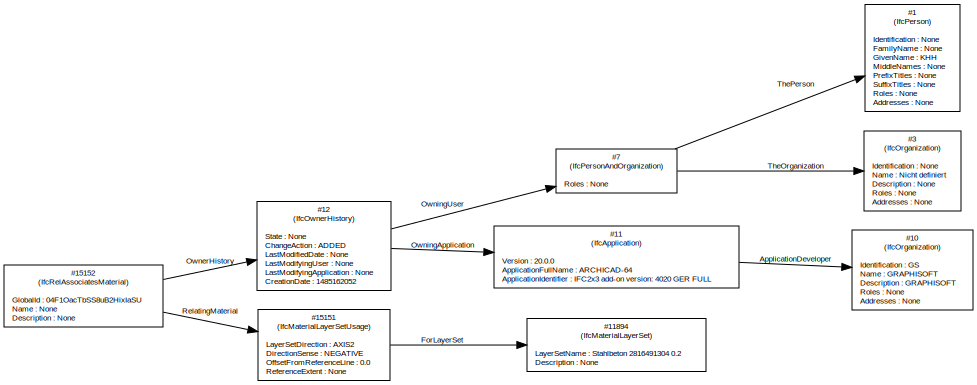

In [199]:
graph = IfcGraphViz.IfcGraphViz().plot_graph(m, m.by_id(15152), forward=10)
graph

In [200]:
schichten = m.by_id(11894)
schichten

#11894=IfcMaterialLayerSet((#11893),'Stahlbeton 2816491304 0.2',$)

In [202]:
m.by_id(11877)

#11877=IfcMaterial('Stahlbeton 2816491304',$,$)

In [187]:
IfcHelp.getHelp3("IfcRelAssociatesMaterial")

In [ ]:
ifcopenshell.util.element.get_psets(wand)

In [ ]:
for inv in m.get_inverse(wand):
    if inv.is_a() == "IfcRelAssociatesMaterial":
        print (inv)
        mat_assoc = inv

In [ ]:
IfcHelp.getHelp3("IfcRelAssociatesMaterial")

In [ ]:
mat_assoc.RelatingMaterial.ForLayerSet.MaterialLayers[0].Material

In [203]:
gesamtvolumen = 0
for w in ausssenwaende:
    psets = ifcopenshell.util.element.get_psets(w)
    for psetname, pset_dict in psets.items():
        for name, value in pset_dict.items():
            # print (f"{name}: {value}")
            if name == "NetVolume":
                gesamtvolumen += float(value)
print (f"Gesamtvolumen: {gesamtvolumen}")               

Gesamtvolument: 463.63364507416964
